In [1]:
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from pytz import all_timezones

In [2]:
folder = "./ASEAN_2018D"
movements_2018_1 = pd.read_csv(filepath_or_buffer = folder + "/ASEAN_2018D_Jan_Mar_JobId2081527.csv", sep = ",", header = 0)
movements_2018_2 = pd.read_csv(filepath_or_buffer = folder + "/ASEAN_2018D_Apr_Jun_JobId2081525.csv", sep = ",", header = 0)
movements_2018_3 = pd.read_csv(filepath_or_buffer = folder + "/ASEAN_2018D_Jul_Sep_JobId2081528.csv", sep = ",", header = 0)
movements_2018_4 = pd.read_csv(filepath_or_buffer = folder + "/ASEAN_2018D_Oct_Dec_JobId2081529.csv", sep = ",", header = 0)
movements_2018 = pd.concat([movements_2018_1, movements_2018_2, movements_2018_3, movements_2018_4])

folder = "./ASEAN_2019D"
movements_2019_1 = pd.read_csv(filepath_or_buffer = folder + "/ASEAN_2019D_Jan_Mar_JobId2082476.csv", sep = ",", header = 0)
movements_2019_2 = pd.read_csv(filepath_or_buffer = folder + "/ASEAN_2019D_Apr_Jun_JobId2081531.csv", sep = ",", header = 0)
movements_2019_3 = pd.read_csv(filepath_or_buffer = folder + "/ASEAN_2019D_Jul_Sep_JobId2081532.csv", sep = ",", header = 0)
movements_2019_4 = pd.read_csv(filepath_or_buffer = folder + "/ASEAN_2019D_Oct_Dec_JobId2082477.csv", sep = ",", header = 0)
movements_2019 = pd.concat([movements_2019_1, movements_2019_2, movements_2019_3, movements_2019_4])

movements_all = pd.concat([movements_2018, movements_2019])

In [3]:
def dep_value(s):
    if s == 'SIN':
        return 1
    else:
        return 0
    
def arr_value(s):
    if s == 'SIN':
        return 1
    else:
        return 0

In [4]:
def dep_or_arr_time(dep, dep_time, arr_time):
    if dep == 1:
        return dep_time
    else:
        return arr_time

In [5]:
def f(s):
    return "".join(["0"]*(4-len(s))) + s

In [6]:
def utc(datetime):
    local = pytz.timezone("Asia/Singapore")
    local_dt = local.localize(datetime, is_dst=None)
    return local_dt.astimezone(pytz.utc)

In [7]:
def day_of_week(s):
    return s.weekday()

In [8]:
def requested_utc_hour(s):
    return s.hour

def requested_utc_minute(s):
    if s.minute == 0:
        return "00"
    elif s.minute == 5:
        return "05"
    else:
        return s.minute

In [9]:
movements_Dep_SIN = movements_all.loc[movements_all['Dep Airport Code'] == 'SIN']
movements_Arr_SIN = movements_all.loc[movements_all['Arr Airport Code'] == 'SIN']
movements_SIN = pd.concat([movements_Dep_SIN, movements_Arr_SIN])

In [10]:
movements_SIN['Dep'] = 0
movements_SIN['Arr'] = 0

movements_SIN['Dep'] = movements_SIN['Dep Airport Code'].apply(dep_value)
movements_SIN['Arr'] = movements_SIN['Arr Airport Code'].apply(arr_value)

In [11]:
movements_SIN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737967 entries, 678011 to 920449
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Dep Airport Code        737967 non-null  object 
 1   Dep Airport Name        737967 non-null  object 
 2   Arr Airport Code        737967 non-null  object 
 3   Arr Airport Name        737967 non-null  object 
 4   ICAO AL                 735774 non-null  object 
 5   IATA AL                 737967 non-null  object 
 6   Flight No               737967 non-null  int64  
 7   Carrier Code            737967 non-null  object 
 8   Carrier Name            737967 non-null  object 
 9   Dep IATA Country Name   737967 non-null  object 
 10  Arr IATA Country Name   737967 non-null  object 
 11  International/Domestic  737967 non-null  object 
 12  Local Dep Time          737967 non-null  int64  
 13  Local Arr Time          737967 non-null  int64  
 14  General Aircraf

In [12]:
movements_SIN[['Dep Airport Code', 'Arr Airport Code', 'Local Dep Time', 'Local Arr Time', 'Time series']]

,Dep Airport Code,Arr Airport Code,Local Dep Time,Local Arr Time,Time series
678011,SIN,ADD,215,605,2018-03-27
678012,SIN,ADD,215,605,2018-03-30
678013,SIN,ADD,215,635,2018-01-03
678014,SIN,ADD,215,635,2018-01-06
678015,SIN,ADD,215,635,2018-01-09
...,...,...,...,...,...
920353,KBV,SIN,1010,1255,2019-11-28
920395,HKT,SIN,1950,2245,2019-10-04
920404,HKG,SIN,2025,15,2019-10-10
920430,KUL,SIN,1035,1135,2019-11-06


In [13]:
movements_SIN['Dep_time_format4'] = movements_SIN['Local Dep Time'].astype(str).apply(f)
movements_SIN['Arr_time_format4'] = movements_SIN['Local Arr Time'].astype(str).apply(f)
movements_SIN['Dep_time_TS'] = movements_SIN['Time series'] + '-' + movements_SIN['Dep_time_format4']
movements_SIN['Arr_time_TS'] = movements_SIN['Time series'] + '-' + movements_SIN['Arr_time_format4']
movements_SIN['Dep_TS_datetime_format'] = pd.to_datetime(movements_SIN['Dep_time_TS'], format = '%Y-%m-%d-%H%M')
movements_SIN['Arr_TS_datetime_format'] = pd.to_datetime(movements_SIN['Arr_time_TS'], format = '%Y-%m-%d-%H%M')

In [14]:
movements_SIN['Dep_time_requested_UTC'] = movements_SIN['Dep_TS_datetime_format'].apply(utc)
movements_SIN['Arr_time_requested_UTC'] = movements_SIN['Arr_TS_datetime_format'].apply(utc)

In [15]:
movements_SIN['Dep_time_series_DT'] = pd.to_datetime(movements_SIN['Dep_time_requested_UTC']).dt.date
movements_SIN['Arr_time_series_DT'] = pd.to_datetime(movements_SIN['Arr_time_requested_UTC']).dt.date

In [16]:
# sort by date
movements_SIN.sort_values(by=['Dep_time_series_DT'], inplace=True)

In [17]:
movements_SIN['Dep_utc_hour'] = movements_SIN['Dep_time_requested_UTC'].apply(requested_utc_hour)
movements_SIN['Arr_utc_hour'] = movements_SIN['Arr_time_requested_UTC'].apply(requested_utc_hour)
movements_SIN['Dep_utc_minute'] = movements_SIN['Dep_time_requested_UTC'].apply(requested_utc_minute)
movements_SIN['Arr_utc_minute'] = movements_SIN['Arr_time_requested_UTC'].apply(requested_utc_minute)
movements_SIN['Dep_utc'] = movements_SIN['Dep_utc_hour'].apply(str) + movements_SIN['Dep_utc_minute'].apply(str)
movements_SIN['Arr_utc'] = movements_SIN['Arr_utc_hour'].apply(str) + movements_SIN['Arr_utc_minute'].apply(str)
movements_SIN['Dep_utc'] = movements_SIN['Dep_utc'].astype(int)
movements_SIN['Arr_utc'] = movements_SIN['Arr_utc'].astype(int)

In [18]:
time_slots = []
h = 0
m = 0
while h < 2400:
    while m < 60:
        time_slots.append(h + m)
        m = m + 5
    m = 0
    h = h + 100
    #print(i)
time_slots.append(2400)
#print(len(time_slots))
#time_slots

In [19]:
movements_SIN['Dep time slot'] = pd.cut(movements_SIN['Dep_utc'], time_slots, right=False)
movements_SIN['Arr time slot'] = pd.cut(movements_SIN['Arr_utc'], time_slots, right=False)

In [20]:
movements_SIN

,Dep Airport Code,Dep Airport Name,Arr Airport Code,Arr Airport Name,ICAO AL,IATA AL,Flight No,Carrier Code,Carrier Name,Dep IATA Country Name,...,Dep_time_series_DT,Arr_time_series_DT,Dep_utc_hour,Arr_utc_hour,Dep_utc_minute,Arr_utc_minute,Dep_utc,Arr_utc,Dep time slot,Arr time slot
617980,PEK,Beijing Capital Intl Apt,SIN,Singapore Changi Apt,CCA,CA,975,CA,Air China,China,...,2017-12-31,2017-12-31,16,22,10,30,1610,2230,"[1610, 1615)","[2230, 2235)"
293146,DPS,Denpasar-Bali,SIN,Singapore Changi Apt,AWQ,QZ,502,QZ,Indonesia AirAsia,Indonesia,...,2017-12-31,2018-01-01,23,1,20,55,2320,155,"[2320, 2325)","[155, 200)"
688429,SIN,Singapore Changi Apt,CMB,Bandaranaike Intl,UAE,EK,349,EK,Emirates,Singapore,...,2017-12-31,2017-12-31,16,17,30,40,1630,1740,"[1630, 1635)","[1740, 1745)"
729527,SIN,Singapore Changi Apt,DME,Moscow Domodedovo Apt,SIA,SQ,362,SQ,Singapore Airlines,Singapore,...,2017-12-31,2017-12-31,16,22,15,20,1615,2220,"[1615, 1620)","[2220, 2225)"
730555,SIN,Singapore Changi Apt,PER,Perth,SIA,SQ,225,SQ,Singapore Airlines,Singapore,...,2017-12-31,2017-12-31,16,21,10,25,1610,2125,"[1610, 1615)","[2125, 2130)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78535,KUL,Kuala Lumpur International Airport,SIN,Singapore Changi Apt,MAS,MH,605,MH,Malaysia Airlines,Malaysia,...,2019-12-31,2019-12-31,7,8,30,35,730,835,"[730, 735)","[835, 840)"
745905,SIN,Singapore Changi Apt,HND,Tokyo Intl (Haneda),ANA,NH,842,NH,All Nippon Airways,Singapore,...,2019-12-31,2019-12-31,2,10,50,25,250,1025,"[250, 255)","[1025, 1030)"
460506,SIN,Singapore Changi Apt,MLE,Male,SLK,MI,480,MI,SilkAir,Singapore,...,2019-12-31,2019-12-31,3,5,15,00,315,500,"[315, 320)","[500, 505)"
540468,JOG,Yogyakarta (ID) 00,SIN,Singapore Changi Apt,SLK,MI,151,MI,SilkAir,Indonesia,...,2019-12-31,2019-12-31,2,5,25,50,225,550,"[225, 230)","[550, 555)"


In [21]:
def timeslot_to_index():
    # convert requested timeslot to index timeslot (eg. (0, 5] is slot 1)
    start = 0
    end = 5
    interval = pd.Interval(left=start, right=end, closed='left')

    # eg. (0, 5] -> slot 1
    interval_slot_dict = {} 

    for slot in range(1, 289, 1):
        interval_slot_dict[interval] = slot
        if (end % 100 == 55):
            start = interval.left + 5
            end = interval.right + 45
        elif (start % 100 == 55):
            start = interval.left + 45
            end = interval.right + 5
        else:
            start = interval.left + 5
            end = interval.right + 5

        interval = pd.Interval(left=start, right=end, closed='left')
        
    return interval_slot_dict

In [22]:
def get_first_week_dates(movements_SIN):
    #first_week = movements_SIN['Time_series_DT'].unique()[0:7]
    first_week = movements_SIN['Dep_time_series_DT'].unique()[0:7]
    return first_week # array with 1st week's dates

In [23]:
def get_random_dates(movements_SIN, num_dates):
    #all_dates = movements_SIN['Time_series_DT'].unique()
    all_dates = movements_SIN['Dep_time_series_DT'].unique()
    dates = np.random.choice(all_dates, num_dates, replace=False)
    return dates # array with num_dates dates

In [24]:
def get_day_df(movements_SIN, date):
    #SIN_2019_s_d1 = movements_SIN.loc[movements_SIN['Time_series_DT'] == date]
    SIN_2019_s_d1 = movements_SIN.loc[movements_SIN['Dep_time_series_DT'] == date]
    return SIN_2019_s_d1 # df of a particualr day

In [25]:
def mov_per_slot(SIN_2019_s_d1, interval_slot_dict):
    timeslot_movements = SIN_2019_s_d1['Time slot'].value_counts(dropna=False)
    timeslot_movements = timeslot_movements.to_frame()
    timeslot_movements = timeslot_movements.rename({'Time slot': 'Movements'}, axis = 1)
    timeslot_movements = timeslot_movements.reset_index()
    
    timeslot_movements['Slot'] = ''
    for index, row in timeslot_movements.iterrows():
        row['Slot'] = interval_slot_dict.get(row['index'])
    
    timeslot_movements['Slot'] = timeslot_movements.apply(lambda row: interval_slot_dict.get(row['index']), axis=1)
    return timeslot_movements

In [26]:
# 1st selected date in array
interval_slot_dict = timeslot_to_index()
dates = get_random_dates(movements_SIN, 7) # change no. as required eg. 2000
#first_week = get_first_week_dates(movements_SIN)
date = dates[0]
SIN_2019_s_d1 = get_day_df(movements_SIN, date)
#timeslot_movements = mov_per_slot(SIN_2019_s_d1, interval_slot_dict)
#timeslot_movements

In [27]:
dates

array([datetime.date(2019, 6, 2), datetime.date(2018, 4, 15),
       datetime.date(2019, 6, 22), datetime.date(2019, 5, 19),
       datetime.date(2019, 5, 14), datetime.date(2019, 5, 11),
       datetime.date(2018, 5, 22)], dtype=object)

In [28]:
SIN_2019_s_d1

,Dep Airport Code,Dep Airport Name,Arr Airport Code,Arr Airport Name,ICAO AL,IATA AL,Flight No,Carrier Code,Carrier Name,Dep IATA Country Name,...,Dep_time_series_DT,Arr_time_series_DT,Dep_utc_hour,Arr_utc_hour,Dep_utc_minute,Arr_utc_minute,Dep_utc,Arr_utc,Dep time slot,Arr time slot
119479,CEB,Cebu,SIN,Singapore Changi Apt,SLK,MI,567,MI,SilkAir,Philippines,...,2019-06-02,2019-06-02,6,10,45,30,645,1030,"[645, 650)","[1030, 1035)"
727626,SIN,Singapore Changi Apt,KUL,Kuala Lumpur International Airport,MXD,OD,808,OD,Malindo Airways,Singapore,...,2019-06-02,2019-06-02,9,10,00,05,900,1005,"[900, 905)","[1005, 1010)"
726577,SIN,Singapore Changi Apt,KUL,Kuala Lumpur International Airport,MAS,MH,608,MH,Malaysia Airlines,Singapore,...,2019-06-02,2019-06-02,10,11,10,20,1010,1120,"[1010, 1015)","[1120, 1125)"
707007,SIN,Singapore Changi Apt,PLM,Palembang,TGW,TR,250,TR,Scoot,Singapore,...,2019-06-02,2019-06-02,7,8,45,05,745,805,"[745, 750)","[805, 810)"
491881,KUL,Kuala Lumpur International Airport,SIN,Singapore Changi Apt,JSA,3K,684,3K,Jetstar Asia,Malaysia,...,2019-06-02,2019-06-02,0,2,50,00,50,200,"[50, 55)","[200, 205)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748653,SIN,Singapore Changi Apt,MEL,Melbourne Airport,SIA,SQ,207,SQ,Singapore Airlines,Singapore,...,2019-06-02,2019-06-03,23,9,45,10,2345,910,"[2345, 2350)","[910, 915)"
745364,SIN,Singapore Changi Apt,KUL,Kuala Lumpur International Airport,MXD,OD,806,OD,Malindo Airways,Singapore,...,2019-06-02,2019-06-02,13,14,30,35,1330,1435,"[1330, 1335)","[1435, 1440)"
653369,REP,Siem Reap,SIN,Singapore Changi Apt,JSA,3K,602,3K,Jetstar Asia,Cambodia,...,2019-06-02,2019-06-02,7,11,55,15,755,1115,"[755, 800)","[1115, 1120)"
647477,PVG,Shanghai Pudong International Apt,SIN,Singapore Changi Apt,CES,MU,543,MU,China Eastern Airlines,China,...,2019-06-02,2019-06-02,16,21,05,25,1605,2125,"[1605, 1610)","[2125, 2130)"


In [29]:
SIN_2019_s_d1 = SIN_2019_s_d1.reset_index()

In [30]:
SIN_2019_s_d1['Dep slot'] = SIN_2019_s_d1.apply(lambda row: interval_slot_dict.get(row['Dep time slot']), axis=1)
SIN_2019_s_d1['Arr slot'] = SIN_2019_s_d1.apply(lambda row: interval_slot_dict.get(row['Arr time slot']), axis=1)
SIN_2019_s_d1['Dep slot'] = SIN_2019_s_d1['Dep slot'].round().astype('Int64')
SIN_2019_s_d1['Arr slot'] = SIN_2019_s_d1['Arr slot'].round().astype('Int64')
SIN_2019_s_d1

,index,Dep Airport Code,Dep Airport Name,Arr Airport Code,Arr Airport Name,ICAO AL,IATA AL,Flight No,Carrier Code,Carrier Name,...,Dep_utc_hour,Arr_utc_hour,Dep_utc_minute,Arr_utc_minute,Dep_utc,Arr_utc,Dep time slot,Arr time slot,Dep slot,Arr slot
0,119479,CEB,Cebu,SIN,Singapore Changi Apt,SLK,MI,567,MI,SilkAir,...,6,10,45,30,645,1030,"[645, 650)","[1030, 1035)",82,127
1,727626,SIN,Singapore Changi Apt,KUL,Kuala Lumpur International Airport,MXD,OD,808,OD,Malindo Airways,...,9,10,00,05,900,1005,"[900, 905)","[1005, 1010)",109,122
2,726577,SIN,Singapore Changi Apt,KUL,Kuala Lumpur International Airport,MAS,MH,608,MH,Malaysia Airlines,...,10,11,10,20,1010,1120,"[1010, 1015)","[1120, 1125)",123,137
3,707007,SIN,Singapore Changi Apt,PLM,Palembang,TGW,TR,250,TR,Scoot,...,7,8,45,05,745,805,"[745, 750)","[805, 810)",94,98
4,491881,KUL,Kuala Lumpur International Airport,SIN,Singapore Changi Apt,JSA,3K,684,3K,Jetstar Asia,...,0,2,50,00,50,200,"[50, 55)","[200, 205)",11,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,748653,SIN,Singapore Changi Apt,MEL,Melbourne Airport,SIA,SQ,207,SQ,Singapore Airlines,...,23,9,45,10,2345,910,"[2345, 2350)","[910, 915)",286,111
1039,745364,SIN,Singapore Changi Apt,KUL,Kuala Lumpur International Airport,MXD,OD,806,OD,Malindo Airways,...,13,14,30,35,1330,1435,"[1330, 1335)","[1435, 1440)",163,176
1040,653369,REP,Siem Reap,SIN,Singapore Changi Apt,JSA,3K,602,3K,Jetstar Asia,...,7,11,55,15,755,1115,"[755, 800)","[1115, 1120)",96,136
1041,647477,PVG,Shanghai Pudong International Apt,SIN,Singapore Changi Apt,CES,MU,543,MU,China Eastern Airlines,...,16,21,05,25,1605,2125,"[1605, 1610)","[2125, 2130)",194,258


In [31]:
def one_hot_encode_airport(airport, num_airports):
    encoding = np.zeros(num_airports)
    encoding[airport] = 1
    return encoding

def use_scenario(SIN_2019_s_d1, num_airports):
    
    number_of_requests = len(SIN_2019_s_d1.index)
    #ts_72 = get_truncated_normal(mean=72, sd=12, low=0, upp=287).rvs(int(round(number_of_requests/2)))
    #ts_72 = np.round(ts_72)

    #ts_216 = get_truncated_normal(mean=216, sd=12, low=0, upp=287).rvs(int(round(number_of_requests/2)))
    #ts_216 = np.round(ts_216)

    #ts_dep = np.concatenate((ts_72, ts_216))
    #ts_dep = ts_dep.astype(int)
    ts_dep = SIN_2019_s_d1['Dep slot'].to_numpy()
    ts_arr = SIN_2019_s_d1['Arr slot'].to_numpy()
    
    dep_airport = SIN_2019_s_d1['Dep'].to_numpy()
    arr_airport = SIN_2019_s_d1['Arr'].to_numpy() 

    #Generate index for requests:
    #index = np.array(list(range(number_of_requests)))
    index = SIN_2019_s_d1.index.to_numpy()

    #origin_airport = np.empty(shape=(number_of_requests,), dtype='object')
    
    #for i in range(number_of_requests):
        ##Generate origin (0 and 1 are two considered origin airports, 2 represent other airports, encoded in one-hot vector):
        #_org_airport = one_hot_encode_airport(0, num_airports)
        #_org_airport_list = _org_airport.tolist()
        #origin_airport[i] = _org_airport_list
       
    # Define requests_full as dtype object
    # requests_full = np.stack((index, ts_dep, start_date_dep, num_of_weeks, date_seq_dep, origin_airport, destination_airport, fly_time, status_cap_dep, ts_arv, start_date_arv, date_seq_arv, status_cap_arv), axis=1)
    num_entries = len(index)  # Given that 'index' is defined using np.array(list(range(number_of_requests)))
    # Create an empty array of the desired shape with dtype=object
    requests_full = np.empty((num_entries, 4), dtype=object)
   
    data = [ts_dep, ts_arr, dep_airport, arr_airport]
    for i, column_data in enumerate(data):
        requests_full[:, i] = column_data

    return requests_full, number_of_requests

In [32]:
num_airports = 2
use_scenario(SIN_2019_s_d1, num_airports)

(array([[82, 127, 0, 1],
        [109, 122, 1, 0],
        [123, 137, 1, 0],
        ...,
        [96, 136, 0, 1],
        [194, 258, 0, 1],
        [68, 75, 1, 0]], dtype=object),
 1043)

In [33]:
from pulp import *

In [34]:
num_airports = 2
flight_requests, number_of_requests = use_scenario(SIN_2019_s_d1, num_airports)
#flight_requests = generate_scenario_MILP(requests)
time_slots = 288 # Time slots and their characteristics
capacity_per_slot = 6
max_movements = 6

In [35]:
# Create a MILP problem
problem = LpProblem(name="Flight_Scheduling", sense=LpMinimize)

# Creating binary decision variables for the departure slots of all flight requests
x = {(req, slot): LpVariable(
        name=f"x_{req}_{slot}", cat="Binary")
     for req in range(number_of_requests)
     for slot in range(time_slots)}

# Creating binary decision variables for the arrival slots of all flight requests
y = {(req, slot): LpVariable(
        name=f"y_{req}_{slot}", cat="Binary")
     for req in range(number_of_requests)
     for slot in range(time_slots)}

# Objective function - minimises the total absolute difference between the requested and allocated time interval
problem += lpSum((x[req, slot] * abs(slot - flight_requests[req][0])) for req in range(number_of_requests) for slot in range(time_slots))

# Constraints -
# ensure that only one slot is assigned to a flight
for req in range(number_of_requests):
    problem += lpSum(x[req, slot] for slot in range(time_slots)) == 1
    problem += lpSum(y[req, slot] for slot in range(time_slots)) == 1
    
# ensure slot interval between arrival and departure flight is equal to flying time
#for req in range(number_of_requests):
#    problem += lpSum(y[req, slot] * slot for slot in range(time_slots)) - lpSum(x[req, slot] * slot for slot in range(time_slots)) == flight_requests[req][1] - flight_requests[req][0]

x_req_belong_airport_0 = []
for req in range(number_of_requests):
    if flight_requests[req][2] == 0:
        x_req_belong_airport_0.append(1)
    else:
        x_req_belong_airport_0.append(0)

y_req_belong_airport_0 = []
for req in range(number_of_requests):
    if flight_requests[req][3] == 0:
        y_req_belong_airport_0.append(1)
    else:
        y_req_belong_airport_0.append(0)

# airport capacity constraints, which limit the number of arrivals and departures at airports
for slot in range(time_slots):
    problem += lpSum((x[req,slot] * x_req_belong_airport_0[req] + y[req,slot] * y_req_belong_airport_0[req]) for req in range(number_of_requests)) <= capacity_per_slot

x_req_belong_airport_1 = []
for req in range(number_of_requests):
    if flight_requests[req][2] == 1:
        x_req_belong_airport_1.append(1)
    else:
        x_req_belong_airport_1.append(0)

y_req_belong_airport_1 = []
for req in range(number_of_requests):
    if flight_requests[req][3] == 1:
        y_req_belong_airport_1.append(1)
    else:
        y_req_belong_airport_1.append(0)

# airport capacity constraints, which limit the number of arrivals and departures at airports
for slot in range(time_slots):
    problem += lpSum((x[req,slot] * x_req_belong_airport_1[req] + y[req,slot] * y_req_belong_airport_1[req]) for req in range(number_of_requests)) <= capacity_per_slot

In [36]:
import time

start_time = time.time()

# Solve the MILP problem
problem.solve()

# Calculate elapsed time
elapsed_time = time.time() - start_time
print(f"Time taken to solve: {elapsed_time} seconds")

updated_slots = []
max_change = float('-inf')
requests_unchanged = 0

# Iterate through the decision variables and check if they are equal to 1
for req in range(number_of_requests):
    dep_slot = None
    arv_slot = None
    for slot in range(time_slots):
        if not dep_slot and x[req, slot].varValue == 1:
            dep_slot = slot
        if not arv_slot and y[req, slot].varValue == 1:
            arv_slot = slot
        if dep_slot and arv_slot:
            break

    change = abs(flight_requests[req][0] - dep_slot)
    if change > max_change:
        max_change = change
    if not change:
        requests_unchanged += 1
    updated_slots.append((req, dep_slot, arv_slot, change))

# Print the slot changes
for entry in updated_slots:
    print(f"Flight Request {entry[0]}: Departure slot changed from slot {flight_requests[entry[0]][0]} to slot {flight_requests[entry[1]]}")

print("Status:", LpStatus[problem.status])
print(f"{requests_unchanged} flight requests out of {number_of_requests} were not shifted.")
print("Maximum Shift:", max_change)
print("Objective Value:", problem.objective.value())

Time taken to solve: 94.2591164112091 seconds
Flight Request 0: Departure slot changed from slot 82 to slot [2 66 1 0]
Flight Request 1: Departure slot changed from slot 109 to slot [214 259 0 1]
Flight Request 2: Departure slot changed from slot 123 to slot [157 171 1 0]
Flight Request 3: Departure slot changed from slot 94 to slot [18 27 1 0]
Flight Request 4: Departure slot changed from slot 11 to slot [285 6 1 0]
Flight Request 5: Departure slot changed from slot 158 to slot [73 105 0 1]
Flight Request 6: Departure slot changed from slot 47 to slot [189 285 0 1]
Flight Request 7: Departure slot changed from slot 23 to slot [119 137 1 0]
Flight Request 8: Departure slot changed from slot 197 to slot [89 135 0 1]
Flight Request 9: Departure slot changed from slot 95 to slot [131 142 1 0]
Flight Request 10: Departure slot changed from slot 30 to slot [90 102 1 0]
Flight Request 11: Departure slot changed from slot 285 to slot [284 8 0 1]
Flight Request 12: Departure slot changed from 

Flight Request 916: Departure slot changed from slot 170 to slot [31 76 1 0]
Flight Request 917: Departure slot changed from slot 90 to slot [73 94 1 0]
Flight Request 918: Departure slot changed from slot 29 to slot [159 223 0 1]
Flight Request 919: Departure slot changed from slot 5 to slot [158 195 0 1]
Flight Request 920: Departure slot changed from slot 80 to slot [179 197 1 0]
Flight Request 921: Departure slot changed from slot 40 to slot [123 196 0 1]
Flight Request 922: Departure slot changed from slot 94 to slot [18 27 1 0]
Flight Request 923: Departure slot changed from slot 32 to slot [270 46 0 1]
Flight Request 924: Departure slot changed from slot 20 to slot [29 39 1 0]
Flight Request 925: Departure slot changed from slot 72 to slot [20 74 0 1]
Flight Request 926: Departure slot changed from slot 102 to slot [288 76 0 1]
Flight Request 927: Departure slot changed from slot 115 to slot [266 18 0 1]
Flight Request 928: Departure slot changed from slot 49 to slot [1 96 1 0]


Objective Value: 6.0


1043


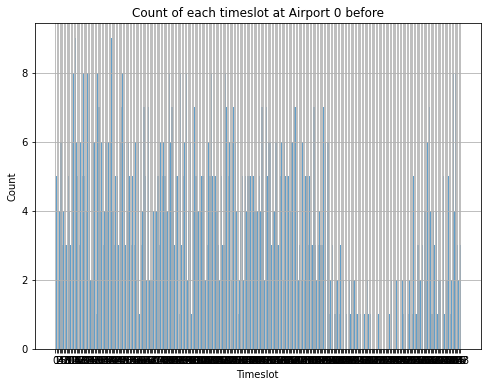

In [39]:
import matplotlib.pyplot as plt

original_slots = [req[0] for req in flight_requests if req[2] == 0]
original_slots.extend(req[1] for req in flight_requests if req[3] == 0)
print(len(original_slots))
# Count occurrences of each slot number
slot_counts = np.bincount(original_slots)

# Create x-axis values (timeslots)
timeslots = np.arange(len(slot_counts))

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(timeslots, slot_counts, align='center', alpha=0.7)
plt.xticks(timeslots)
plt.xlabel('Timeslot')
plt.ylabel('Count')
plt.title('Count of each timeslot at Airport 0 before')
plt.grid(True)
plt.show()

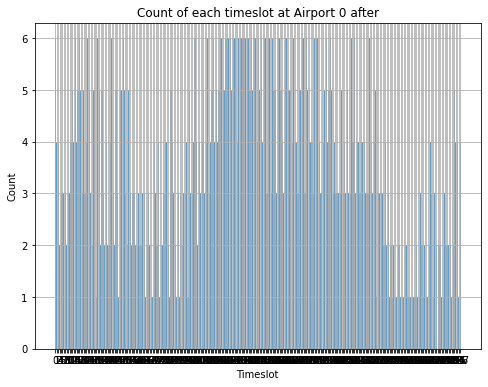

In [40]:
new_slots = [entry[1] for entry in updated_slots if flight_requests[entry[0]][2] == 0]
new_slots.extend(entry[2] for entry in updated_slots if flight_requests[entry[0]][3] == 0)

# Count occurrences of each slot number
slot_counts = np.bincount(new_slots)

# Create x-axis values (timeslots)
timeslots = np.arange(len(slot_counts))

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(timeslots, slot_counts, align='center', alpha=0.7)
plt.xticks(timeslots)
plt.xlabel('Timeslot')
plt.ylabel('Count')
plt.title('Count of each timeslot at Airport 0 after')
plt.grid(True)
plt.show()

1043


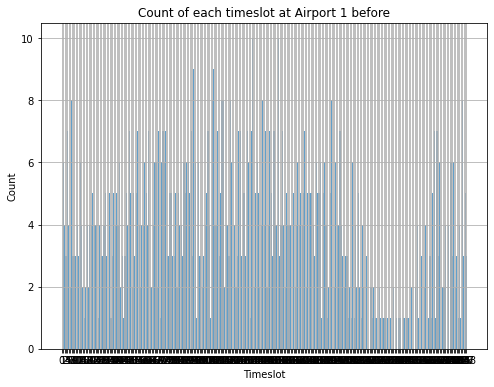

In [41]:
import matplotlib.pyplot as plt

original_slots = [req[0] for req in flight_requests if req[2] == 1]
original_slots.extend(req[1] for req in flight_requests if req[3] == 1)
print(len(original_slots))
# Count occurrences of each slot number
slot_counts = np.bincount(original_slots)

# Create x-axis values (timeslots)
timeslots = np.arange(len(slot_counts))

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(timeslots, slot_counts, align='center', alpha=0.7)
plt.xticks(timeslots)
plt.xlabel('Timeslot')
plt.ylabel('Count')
plt.title('Count of each timeslot at Airport 1 before')
plt.grid(True)
plt.show()

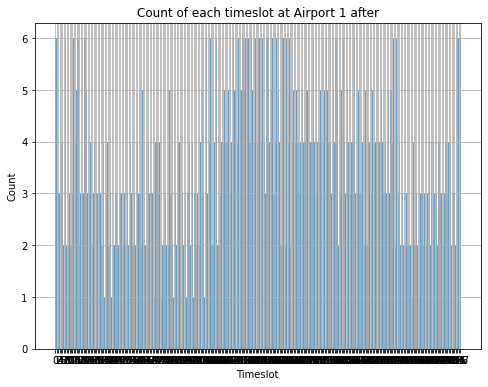

In [42]:
new_slots = [entry[1] for entry in updated_slots if flight_requests[entry[0]][2] == 1]
new_slots.extend(entry[2] for entry in updated_slots if flight_requests[entry[0]][3] == 1)

# Count occurrences of each slot number
slot_counts = np.bincount(new_slots)

# Create x-axis values (timeslots)
timeslots = np.arange(len(slot_counts))

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(timeslots, slot_counts, align='center', alpha=0.7)
plt.xticks(timeslots)
plt.xlabel('Timeslot')
plt.ylabel('Count')
plt.title('Count of each timeslot at Airport 1 after')
plt.grid(True)
plt.show()

In [32]:
# To use only for getting more days
interval_slot_dict = timeslot_to_index()
num_airports = 1
scenario_list = []

for date in dates:
    SIN_2019_s_d1 = get_day_df(movements_SIN, date)
    SIN_2019_s_d1 = SIN_2019_s_d1.reset_index()
    
    SIN_2019_s_d1['Slot'] = SIN_2019_s_d1.apply(lambda row: interval_slot_dict.get(row['Time slot']), axis=1)
    SIN_2019_s_d1['Slot'] = SIN_2019_s_d1['Slot'].round().astype('Int64')
    
    scenario = use_scenario(SIN_2019_s_d1, num_airports)
    scenario_list.append(scenario)

In [33]:
scenario_list

[(array([[0, 106, list([1.0])],
         [1, 12, list([1.0])],
         [2, 120, list([1.0])],
         ...,
         [922, 124, list([1.0])],
         [923, 72, list([1.0])],
         [924, 104, list([1.0])]], dtype=object),
  925),
 (array([[0, 137, list([1.0])],
         [1, 138, list([1.0])],
         [2, 196, list([1.0])],
         ...,
         [864, 176, list([1.0])],
         [865, 213, list([1.0])],
         [866, 24, list([1.0])]], dtype=object),
  867),
 (array([[0, 119, list([1.0])],
         [1, 101, list([1.0])],
         [2, 59, list([1.0])],
         ...,
         [836, 17, list([1.0])],
         [837, 69, list([1.0])],
         [838, 147, list([1.0])]], dtype=object),
  839),
 (array([[0, 87, list([1.0])],
         [1, 117, list([1.0])],
         [2, 137, list([1.0])],
         ...,
         [965, 35, list([1.0])],
         [966, 100, list([1.0])],
         [967, 175, list([1.0])]], dtype=object),
  968),
 (array([[0, 130, list([1.0])],
         [1, 275, list([1.0])],
